In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import data_prep
import data_exploration

In [2]:
#Figure formattings
font = {'family' : 'serif',
        'size'   : 15}

plt.rc('font', **font)
plt.rc('lines', linewidth=3)
plt.rc('axes', linewidth=3)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)

In [3]:
machine_name = 'Theta'

In [4]:
df_full = data_prep.load_parse_engineered_df(machine_name)
df_full.head()

,JOB_NAME,COBALT_JOBID,MACHINE_NAME,QUEUED_TIMESTAMP,QUEUED_DATE_ID,START_TIMESTAMP,START_DATE_ID,END_TIMESTAMP,END_DATE_ID,USERNAME_GENID,...,ELIGIBLE_WAIT_HOURS,JOBS_RUNNING1,JOBS_QUEUED,JOBS_RUNNING,SAME_QUEUE_JOBS_RUNNING,IS_WEEKEND,IS_NIGHT,QUEUE_AVG_WAIT,RUNTIME_HOURS_MASKED,QUEUE_AVG_RUNTIME
13,106679.theta,106679,theta,2017-06-30 18:42:02,20170630,2017-06-30 18:42:24,20170630,2017-07-01 00:43:45,20170701,60099593019159,...,0.005278,0,1,0,0,False,False,0.910811,6.022500,0.439569
7,106686.theta,106686,theta,2017-06-30 19:00:14,20170630,2017-06-30 19:00:55,20170630,2017-07-01 00:20:31,20170701,82859864357327,...,0.009722,1,1,1,1,False,False,0.006111,5.326667,6.022500
6,106722.theta,106722,theta,2017-06-30 20:18:56,20170630,2017-06-30 20:19:20,20170630,2017-07-01 00:20:31,20170701,39882124280502,...,0.005000,2,1,2,0,False,False,0.126266,4.019722,0.334725
8,106724.theta,106724,theta,2017-06-30 20:19:54,20170630,2017-06-30 20:20:16,20170630,2017-07-01 00:21:24,20170701,39882124280502,...,0.005278,3,1,3,1,False,False,0.006667,4.018889,4.019722
18,106728.theta,106728,theta,2017-06-30 20:26:14,20170630,2017-06-30 20:28:08,20170630,2017-07-01 17:55:28,20170701,17031593209612,...,0.030278,4,1,4,2,False,False,0.008750,21.455556,5.674583


In [5]:
df_full.tail()

,JOB_NAME,COBALT_JOBID,MACHINE_NAME,QUEUED_TIMESTAMP,QUEUED_DATE_ID,START_TIMESTAMP,START_DATE_ID,END_TIMESTAMP,END_DATE_ID,USERNAME_GENID,...,ELIGIBLE_WAIT_HOURS,JOBS_RUNNING1,JOBS_QUEUED,JOBS_RUNNING,SAME_QUEUE_JOBS_RUNNING,IS_WEEKEND,IS_NIGHT,QUEUE_AVG_WAIT,RUNTIME_HOURS_MASKED,QUEUE_AVG_RUNTIME
98704,685817.theta,685817,theta,2023-12-31 21:50:58,20231231,2023-12-31 22:42:08,20231231,2023-12-31 23:02:59,20231231,23767306201051,...,0.842222,7,4,6,2,True,False,14.777327,0.347442,1.432818
98707,685822.theta,685822,theta,2023-12-31 22:56:57,20231231,2023-12-31 22:59:01,20231231,2023-12-31 23:19:26,20231231,23767306201051,...,0.018333,7,1,7,3,True,False,14.777129,0.340283,1.432803
98709,685823.theta,685823,theta,2023-12-31 23:03:01,20231231,2023-12-31 23:04:45,20231231,2023-12-31 23:25:34,20231231,23767306201051,...,0.013611,6,1,6,2,True,False,14.776920,0.346750,1.432787
98711,685824.theta,685824,theta,2023-12-31 23:20:06,20231231,2023-12-31 23:20:43,20231231,2023-12-31 23:41:15,20231231,23767306201051,...,0.000000,4,1,4,2,True,False,14.776711,0.342442,1.432772
98713,685825.theta,685825,theta,2023-12-31 23:25:04,20231231,2023-12-31 23:25:56,20231231,2023-12-31 23:46:18,20231231,23767306201051,...,0.005000,4,1,4,3,True,False,14.776502,0.339431,1.432756


# Data Filtering for Prediction

In [7]:
print(df_full.shape)
df_filtered = df_full[df_full['ELIGIBLE_WAIT_HOURS'] != 0]
print(df_filtered.shape)

#Focus on default, debug and backfill queues
df_filtered=df_filtered.apply(lambda row: row[df_filtered['QUEUE_NAME'].isin(['default','backfill','debug-cache-quad', 'debug-flat-quad'])])       
print(df_filtered.columns)

(540503, 76)
(496908, 76)
Index(['JOB_NAME', 'COBALT_JOBID', 'MACHINE_NAME', 'QUEUED_TIMESTAMP',
       'QUEUED_DATE_ID', 'START_TIMESTAMP', 'START_DATE_ID', 'END_TIMESTAMP',
       'END_DATE_ID', 'USERNAME_GENID', 'PROJECT_NAME_GENID',
       'ALLOCATION_AWARD_CATEGORY', 'QUEUE_NAME', 'WALLTIME_SECONDS',
       'RUNTIME_SECONDS', 'NODES_USED', 'NODES_REQUESTED', 'CORES_USED',
       'CORES_REQUESTED', 'LOCATION', 'EXIT_STATUS', 'ELIGIBLE_WAIT_SECONDS',
       'ELIGIBLE_WAIT_FACTOR', 'QUEUED_WAIT_SECONDS', 'QUEUED_WAIT_FACTOR',
       'REQUESTED_CORE_HOURS', 'USED_CORE_HOURS',
       'CAPABILITY_USAGE_CORE_HOURS', 'NONCAPABILITY_USAGE_CORE_HOURS',
       'BUCKETS3_A_USAGE_CORE_HOURS', 'BUCKETS3_B_USAGE_CORE_HOURS',
       'BUCKETS3_C_USAGE_CORE_HOURS', 'MACHINE_PARTITION', 'EXIT_CODE', 'MODE',
       'RESID', 'DATA_LOAD_STATUS', 'CAPABILITY', 'SIZE_BUCKETS3',
       'PERCENTILE', 'NUM_TASKS_SUBBLOCK', 'NUM_TASKS_CONSECUTIVE',
       'NUM_TASKS_MULTILOCATION', 'NUM_TASKS_SINGLE', 'COBAL

# Encode Categorical Columns and Remove Others

In [9]:
df = data_prep.subset_columns_training(df_filtered)
print(df.shape)

df_encoded = data_prep.encode_categorical_variables(df)
print(df_encoded.shape)

(477208, 24)
(477208, 24)
(477208, 24)
(477208, 24)


In [10]:
print(df_encoded['ELIGIBLE_WAIT_HOURS'].describe())

count    477208.000000
mean          7.142062
std          35.100429
min           0.000278
25%           0.008889
50%           0.023611
75%           1.456944
max        3654.370833
Name: ELIGIBLE_WAIT_HOURS, dtype: float64


# Split into train and testing

In [12]:
train_set, test_set, eval_set, X_train, y_train, X_test, y_test, X_eval, y_eval = data_prep.split_dataset(df_encoded)

Train set: 286324
Test set: 95442
Eval set: 95442
X_train shape: (286324, 23), y_train shape: (286324,)
X_test shape: (95442, 23), y_test shape: (95442,)
X_eval shape: (95442, 23), y_eval shape: (95442,)


# Remove Outliers

(281133, 23)
(281133,)


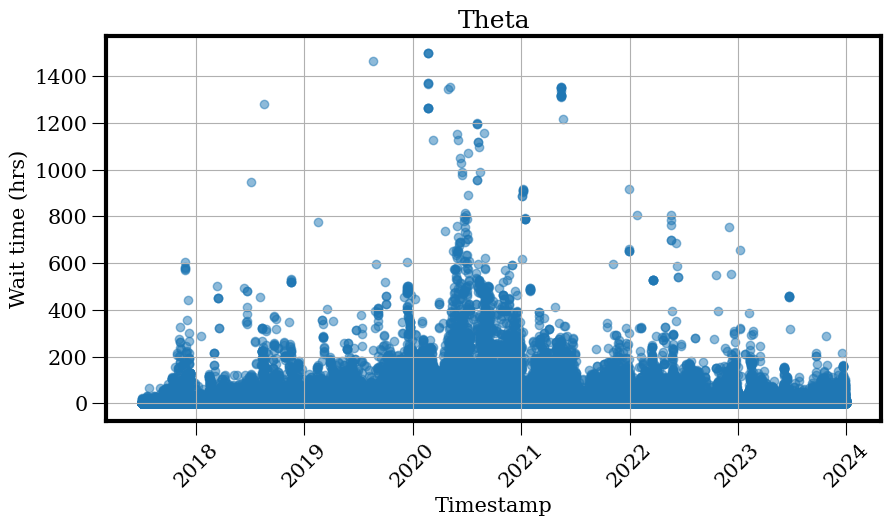

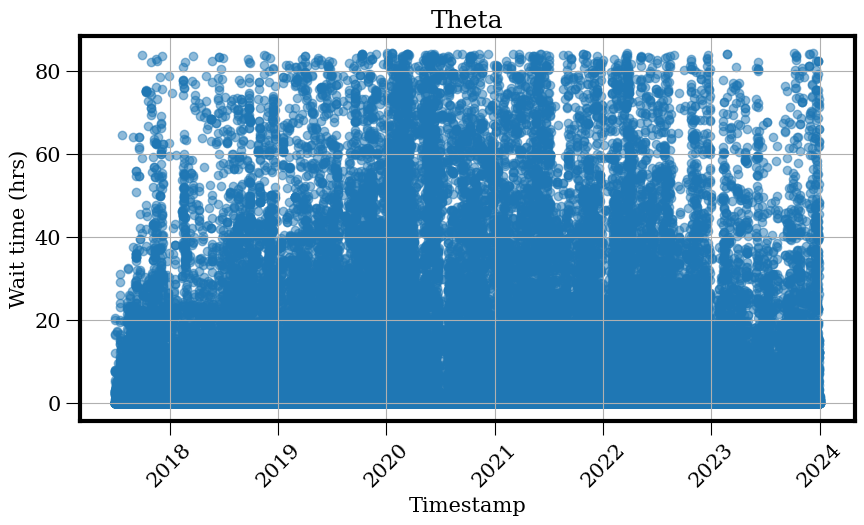

(281133,)


In [14]:
X_train_without_outliers, y_train_without_outliers = data_prep.outlier_removal(X_train, y_train, machine_name)

# Remove Timestamp

In [16]:
# not float/int so challenging for later 
X_train=data_prep.remove_timestamp(X_train)
X_train_without_outliers=data_prep.remove_timestamp(X_train_without_outliers)
X_test=data_prep.remove_timestamp(X_test)
X_eval=data_prep.remove_timestamp(X_eval)

# Checking Correlations on Training Data (without Outliers)

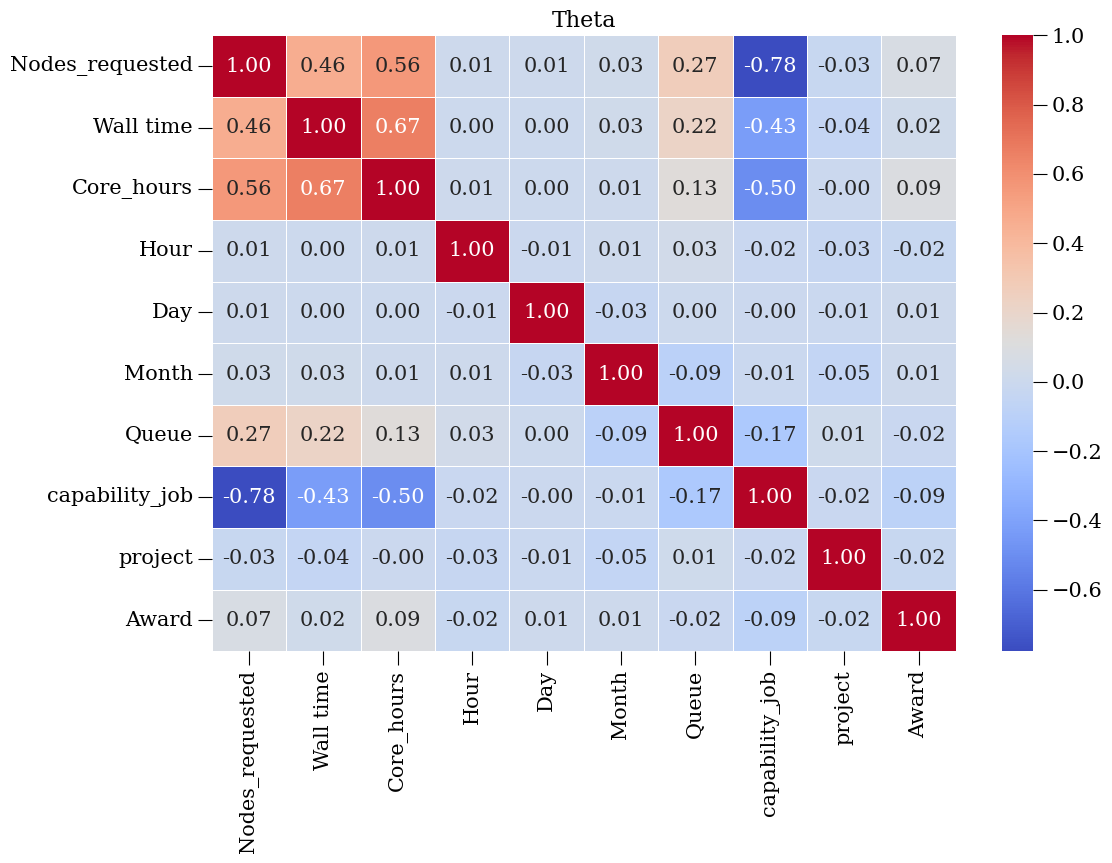

In [18]:
data_exploration.plot_correlations(X_train_without_outliers, machine_name)

# Feature Selection

In [20]:
#Data Standardization; Standardize features
X_train_without_outliers_rescaled, X_test_rescaled, X_eval_rescaled = data_prep.rescale_data(X_train_without_outliers, X_test, X_eval)

X_test size:(95442, 22)
X_test_rescaled size:(95442, 22)
X_eval_rescaled size:(95442, 22)


(281133, 22)
(95442, 22)
Cummulative variance (percent:)/n/t[ 18.18143049  29.47339036  38.57146479  44.55900873  50.30792089
  55.71729491  60.92163525  66.04924731  70.88247793  75.54648493
  80.04761321  84.32324093  88.47931477  92.51964423  96.08076085
  97.6203134   98.96041772 100.         100.         100.
 100.         100.        ]
(281133, 17)
(95442, 17)
(95442, 17)


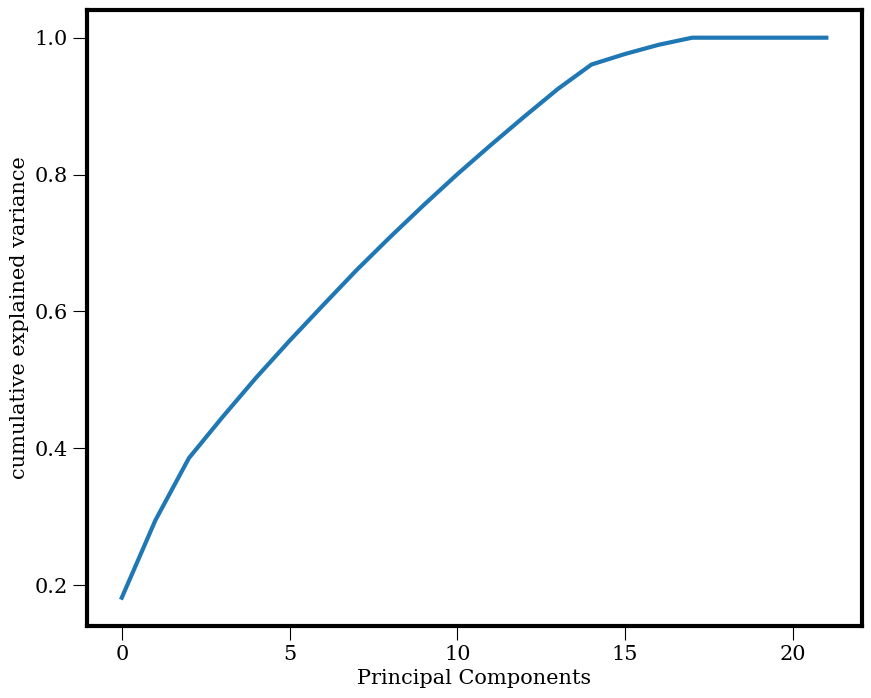

In [21]:
# save column names for future use
feature_names =X_train_without_outliers.columns 

# Use PCA + clustering to select subset of features 
X_train_reduced, X_test_reduced, X_eval_reduced, selected_features = data_prep.feature_selection(X_train_without_outliers_rescaled, 
                                                                                 X_test_rescaled, X_eval_rescaled,feature_names)

In [22]:
y_train_log, y_eval_log, y_test_log=data_prep.rescale_target(y_train, y_eval, y_test, machine_name)
print(y_train_log.shape)
print(y_eval_log.shape)
print(y_test_log.shape)

(286324,)
(95442,)
(95442,)


In [23]:
X_train_class_reduced, y_train_class_reduced, X_test_class_reduced, y_test_class_reduced, X_eval_class_reduced, y_eval_class_reduced,X_train_class, y_train_class, X_test_class, y_test_class,X_eval_class, y_eval_class = data_prep.process_wait_time_range(train_set, test_set, eval_set, selected_features)


WAIT_TIME_RANGE
0    69315
1     4146
2     4291
3     2666
4     1798
5     1447
6     1143
7     4199
8     6437
Name: count, dtype: int64
Index(['ELIGIBLE_WAIT_HOURS', 'QUEUED_TIMESTAMP', 'QUEUED_DATE_ID',
       'NODES_REQUESTED', 'CORES_REQUESTED', 'WALLTIME_HOURS',
       'REQUESTED_CORE_HOURS', 'HOUR', 'DAY', 'MONTH', 'YEAR',
       'COBALT_NUM_TASKS', 'IS_SINGLE', 'JOBS_QUEUED', 'JOBS_RUNNING',
       'IS_WEEKEND', 'IS_NIGHT', 'QUEUE_NAME_ENC', 'CAPABILITY_ENC',
       'PROJECT_NAME_GENID_ENC', 'ALLOCATION_AWARD_CATEGORY_ENC',
       'DAY_NAME_ENC', 'MODE_ENC', 'USERNAME_GENID_ENC', 'WAIT_TIME_RANGE'],
      dtype='object')
WAIT_TIME_RANGE
0    72.625259
1     4.343999
2     4.495924
3     2.793320
4     1.883867
5     1.516104
6     1.197586
7     4.399531
8     6.744410
Name: proportion, dtype: float64
Index(['QUEUED_DATE_ID', 'NODES_REQUESTED', 'CORES_REQUESTED',
       'WALLTIME_HOURS', 'REQUESTED_CORE_HOURS', 'HOUR', 'DAY', 'MONTH',
       'YEAR', 'COBALT_NUM_TASKS', 'IS_S

In [24]:
# save final data for training/testing
data_prep.save_final_data(X_train, y_train, X_test, y_test, X_eval, y_eval, y_train_log, y_eval_log, y_test_log, y_train_without_outliers, X_train_without_outliers, X_train_reduced, X_test_reduced, X_eval_reduced, X_train_class, y_train_class,X_test_class,y_test_class, X_eval_class, y_eval_class, X_train_class_reduced, y_train_class_reduced, X_test_class_reduced, y_test_class_reduced, X_eval_class_reduced, y_eval_class_reduced, machine_name)

(286324,)
